# 8-1. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

## (1) 데이터 가져오기

In [1]:
# 라이브러리 가져오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 당뇨병 환자 데이터 불러오기
diabetes=load_diabetes()

In [2]:
# # 데이터 확인
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
# diabetes의 data를 df_X에, target을 df_y에 저장하기
df_X = diabetes.data
df_y = diabetes.target

## (2) 모델에 입력할 데이터 X 준비하기

In [4]:
# df_X에 있는 값들을 numpy array로 변환해서 저장
# -> 불러올 때 Bunch 객체로 불러왔기 때문에, 기본타입이 ndarray 이다.
X = df_X

## (3) 모델에 예측할 데이터 y 준비하기

In [5]:
# df_y에 있는 값들을 numpy array로 변환해서 저장
# -> 마찬가지로, 불러올 때 Bunch 객체로 불러왔기 때문에 기본타입이 ndarray
y = df_y

## (4) train 데이터와 test 데이터로 분리하기

In [6]:
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분리(train:test = 8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## (5) 모델 준비하기

In [7]:
# 가중치 W 초기값 설정 - X의 피처가 10개 이므로 가중치(w1~w10)도 10개 준비
W = np.random.rand(10)

# 바이어스 b 초기값 설정 - 1개 준비
b = np.random.rand()

# W, b 확인
W, b

(array([0.12913998, 0.50859888, 0.53680663, 0.38512694, 0.5265206 ,
        0.80736369, 0.9110996 , 0.72966338, 0.64091513, 0.99873497]),
 0.3574970769978403)

In [8]:
# 모델함수 구현
def model(X, W, b):
    pred = 0
    # y(pred) = w1x1 + ... + w10x10 + b
    for i in range(10):
        pred += X[:, i] * W[i]
    pred += b
    return pred

## (6) 손실함수 loss 정의하기

In [9]:
# 손실함수 구현
def loss(X, W, b, y):
    pred = model(X, W, b) # 예측값 구하기
    # MSE(Mean Squared Error)두 값의 차이의 제곱의 평균으로 손실값 계산
    L = ((pred - y) ** 2).mean()  
    return L

## (7) 기울기를 구하는 gradient 함수 구현하기

In [10]:
# 기울기 계산 함수 구현
def gradient(X, W, b, y):
    N = len(y) # 데이터 개수 준비
    y_pred = model(X, W, b) # 예측값 준비
    dW = 1/N * 2 * X.T.dot(y_pred - y) # W의 기울기 계산      
    db = 2 * (y_pred - y).mean() # b의 기울기 계산
    return dW, db

## (8) 하이퍼 파라미터인 학습률 설정하기

In [11]:
# 학습률 설정
LEARNING_RATE = 0.1

## (9) 모델 학습하기

In [12]:
# 손실함수 결과값 기록
losses = []

# 정의된 손실함수와 기울기 함수로 모델 학습
for i in range(10000):
    dW, db = gradient(X_train, W, b, y_train) # 기울기 구하기
    W -= LEARNING_RATE * dW # W 업데이트 : w′ = w−ηg
    b -= LEARNING_RATE * db # b 업데이트 : b′ = b−ηg
    L = loss(X_train, W, b, y_train) # 손실값 구하기
    losses.append(L) # 손실값 기록  
    
# 학습 완료 후 손실값 확인
losses[-1]

2897.9873140809896

## (10) test 데이터에 대한 성능 확인하기

In [13]:
pred = model(X_test, W, b) # 테스트 데이터 예측값 구하기
mse = loss(X_test, W, b, y_test) # 테스트 데이터 손실값 구하기

# 손실값 확인
mse

2880.2135827380225

### 손실값 비교 
#### 학습 데이터:테스트 데이터 =  2898 : 2880
#### 테스트 데이터의 손실값과 학습 데이터 손실값이 유사함을 확인함

## (11) 정답 데이터와 예측한 데이터 시각화하기

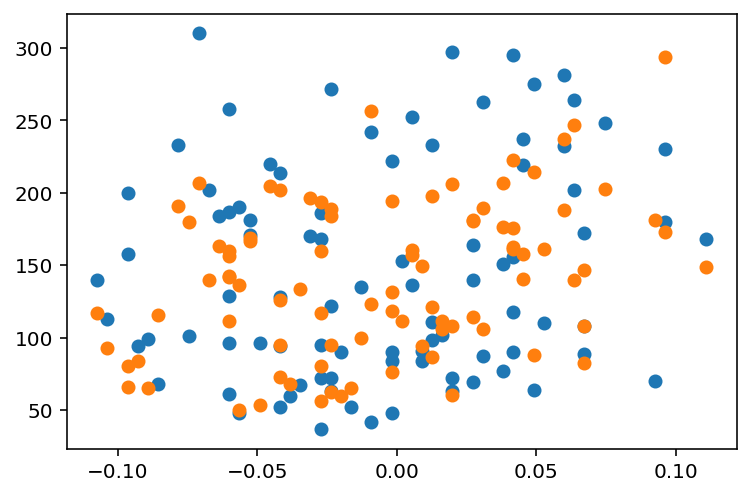

In [14]:
# x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화
plt.scatter(X_test[:, 0], y_test) # 정답 
plt.scatter(X_test[:, 0], pred) # 모델 예측값
plt.show()

### 모델의 예측값(주황)이 어느 정도 정답(파랑)과 유사함을 확인할 수 있다.

***
# 8-2. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

## (1) 데이터 가져오기

In [48]:
# 데이터 로딩
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

# 데이터 확인
print(train.shape)
train.info()
train.head()

(10886, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 데이터 필드 내용 확인
  
* **datetime** : 시간별 날짜 + 타임스탬프  
* **season** :  
    * 1 = 봄  
    * 2 = 여름  
    * 3 = 가을  
    * 4 = 겨울  
* **holiday** : 해당 날짜가 휴일로 간주되는지 여부  
* **workingday** : 해당 날짜가 주말이나 휴일이 아닌지 여부  
* **weather** :  
    * 1 = 맑음, 거의 없음 구름, 약간 흐림, 약간 흐림  
    * 2 = 안개 + 흐림, 안개 + 부서진 구름, 안개 + 약간의 구름, 안개  
    * 3 = 가벼운 눈, 가벼운 비 + 뇌우 + 흩어진 구름, 가벼운 비 + 흩어진 구름  
    * 4 = 폭우 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개  
* **temp** : 섭씨 온도  
* **atemp** : "느낌" 온도(섭씨 온도)  
* **humidity** : 상대 습도  
* **windspeed** : 풍속  
* **casual** : 미등록 사용자 대여 개시 수  
* **registered** : 등록 사용자 대여 개시  
* **count** : 총 대여 수  

## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [49]:
# datetime 컬럼 변환 
train['datetime'] = pd.to_datetime(train['datetime'])

# 연, 월, 일, 시, 분, 초 컬럼 생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

# 데이터프레임 확인
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

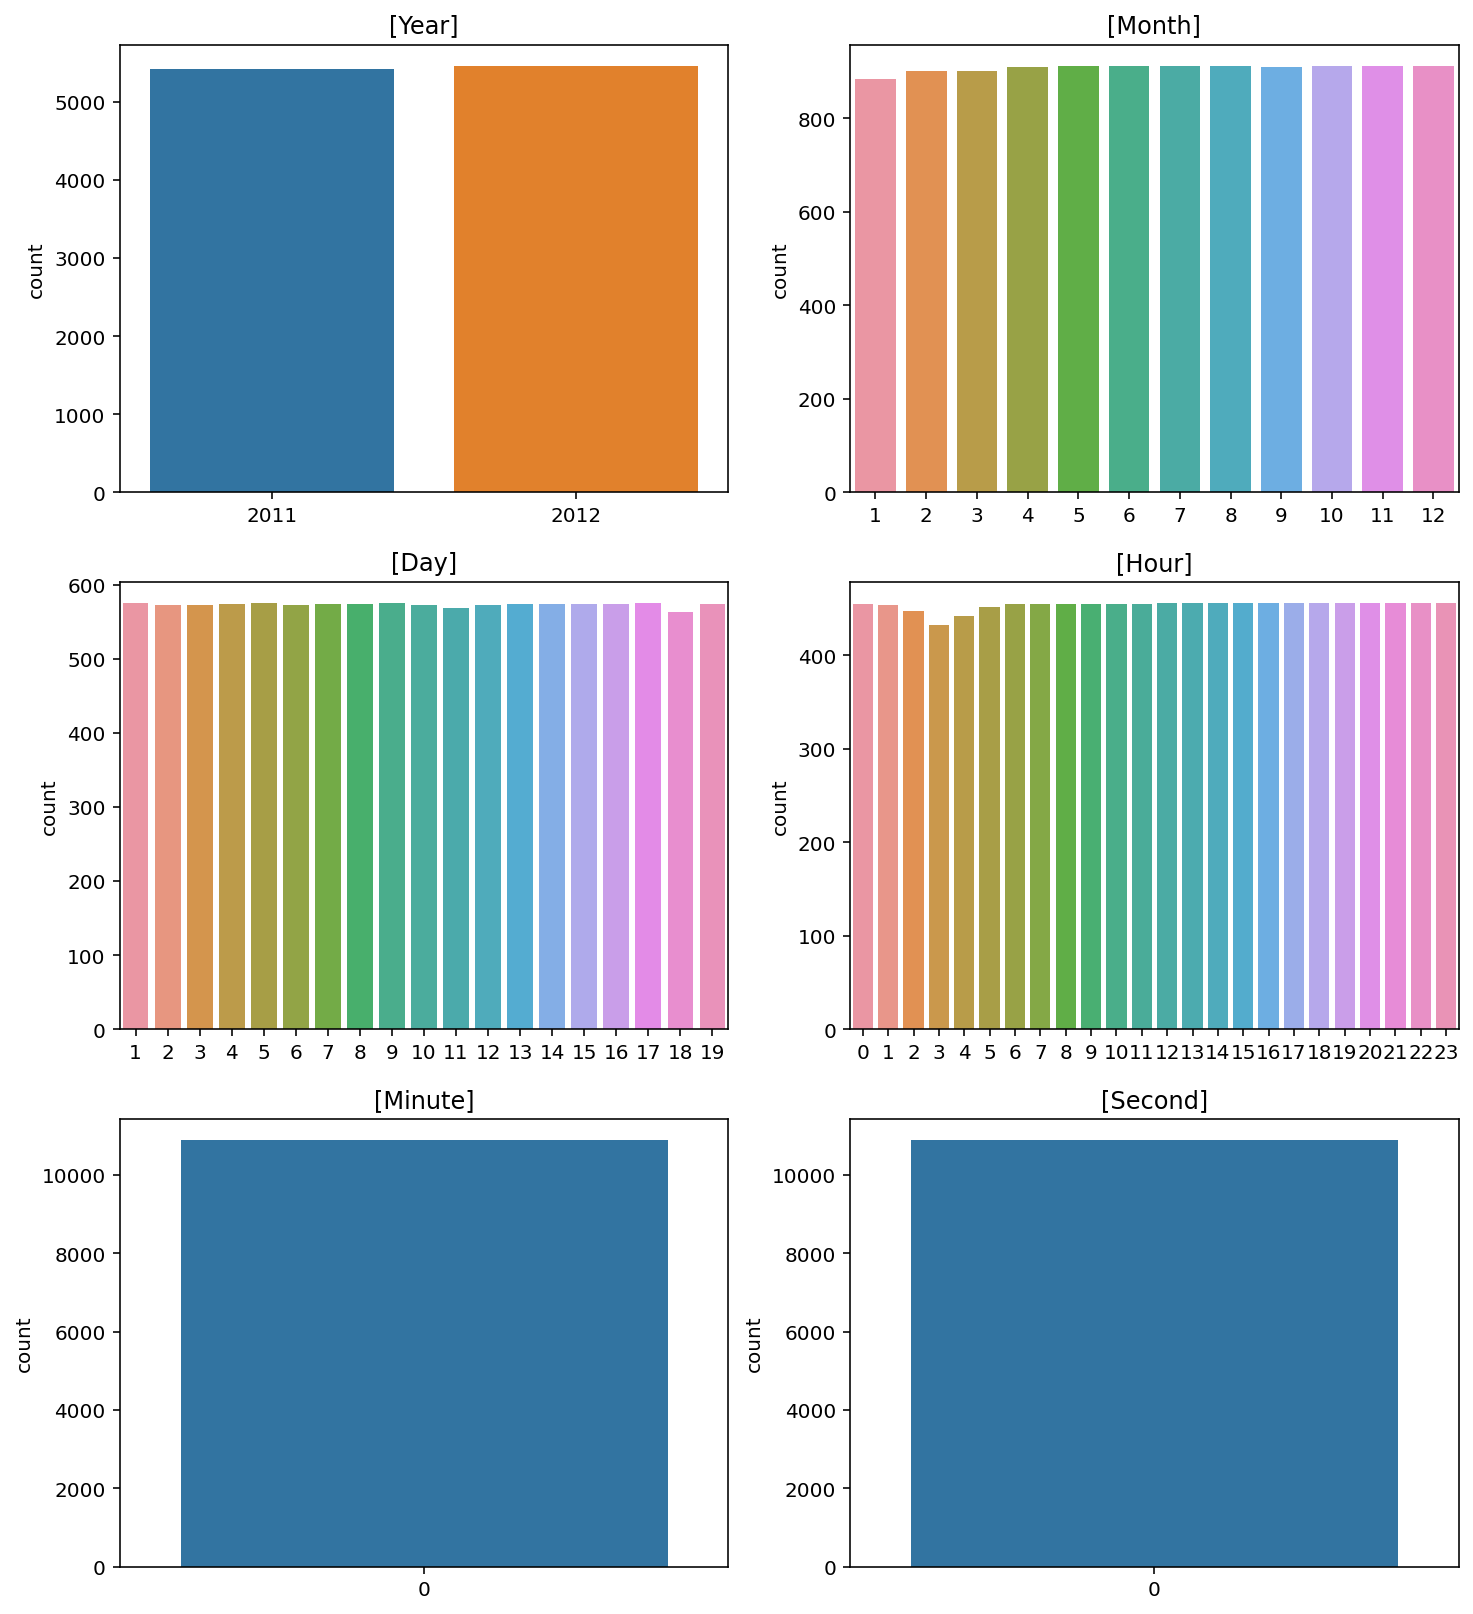

In [50]:
# 차트 설정 (3x2) - subplot 이용
plt.figure(figsize=(12, 14))  
plt.subplot(321)
sns.countplot(data=train, x="year").set_xlabel('')
plt.title("[Year]")
plt.subplot(322)
sns.countplot(data=train, x="month").set_xlabel('')
plt.title("[Month]")
plt.subplot(323)
sns.countplot(data=train, x="day").set_xlabel('')
plt.title("[Day]")
plt.subplot(324)
sns.countplot(data=train, x="hour").set_xlabel('')
plt.title("[Hour]")
plt.subplot(325)
sns.countplot(data=train, x="minute").set_xlabel('')
plt.title("[Minute]")
plt.subplot(326)
sns.countplot(data=train, x="second").set_xlabel('')
plt.title("[Second]")

plt.show()

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [51]:
# feature/target 구분
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
            'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
target = ['count']

# X, y 지정
X = train[features].values
y = train[target].values

# X, y 확인
X, y

(array([[ 1.,  0.,  0., ...,  1.,  1.,  0.],
        [ 1.,  0.,  0., ...,  1.,  1.,  1.],
        [ 1.,  0.,  0., ...,  1.,  1.,  2.],
        ...,
        [ 4.,  0.,  1., ..., 12., 19., 21.],
        [ 4.,  0.,  1., ..., 12., 19., 22.],
        [ 4.,  0.,  1., ..., 12., 19., 23.]]),
 array([[ 16],
        [ 40],
        [ 32],
        ...,
        [168],
        [129],
        [ 88]]))

In [52]:
# train/test 데이터 분리 (train:test = 8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## (5) LinearRegression 모델 학습

In [53]:
model = LinearRegression() # 선형회귀모델 생성
model.fit(X_train, y_train) # 학습 진행

LinearRegression()

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

### (6-1) 학습된 모델에 X_test를 입력해서 예측값 출력

In [57]:
pred = model.predict(X_test)
print(f'predictions shape:{pred.shape}\n')
print(pred)

predictions shape:(2178, 1)

[[248.10627003]
 [ 48.79765547]
 [200.90676727]
 ...
 [309.7528022 ]
 [ 38.17030198]
 [243.62697388]]


### (6-2) 모델이 예측한 값과 정답 target 간의 손실함수 값 계산

In [73]:
# 손실함수 구현
def lossf(p, y, mode='mse'):
    loss = (((p - y) ** 2).mean()) # MSE(Mean Squared Error)
    if mode == 'rmse':
        loss = np.sqrt(loss) # RMSE(Root Mean Squared Error)
    return loss

# 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
mse = lossf(pred, y_test)
rmse = lossf(pred, y_test, 'rmse')
    

### (6-3) MSE, RMSE 값 확인하기

In [74]:
# MSE 값 확인
mse

19945.37005375412

In [75]:
# RMSE 값 확인
rmse

141.22807813517156

## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

### (7-1) x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기

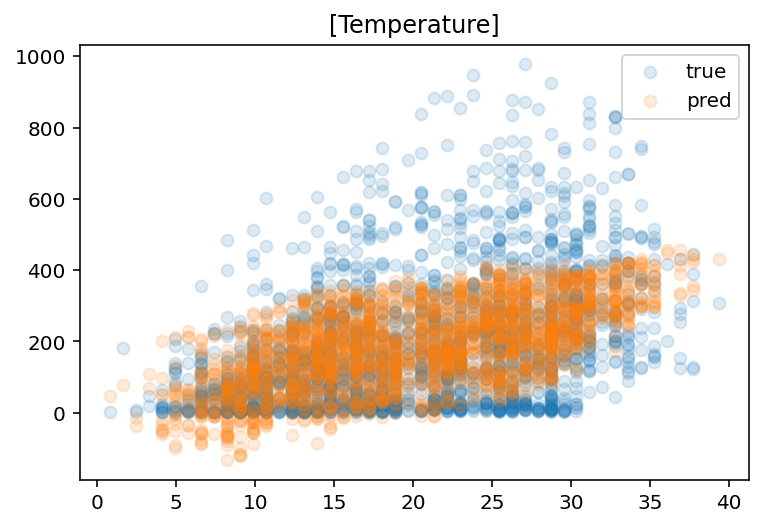

In [90]:
plt.scatter(X_test[:, 4], y_test, label="true", alpha=0.15) # 실제 값(5번째 컬럼이 temp)
plt.scatter(X_test[:, 4], pred, label="pred", alpha=0.15) # 예측 값
plt.legend()
plt.title('[Temperature]')
plt.show()

### (7-2) x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

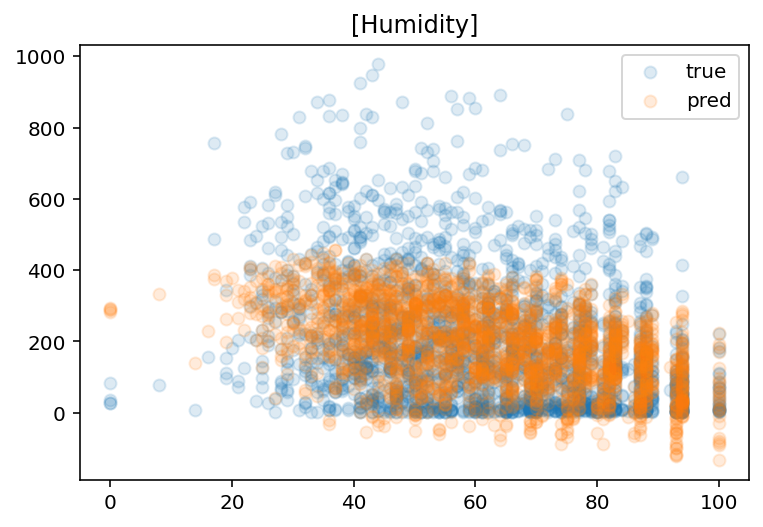

In [89]:
plt.scatter(X_test[:, 6], y_test, label="true", alpha=0.15) # 실제 값(7번째 컬럼이 humidity)
plt.scatter(X_test[:, 6], pred, label="pred", alpha=0.15)
plt.legend()
plt.title('[Humidity]')
plt.show()

###  데이터 검증을 위한 확인...

In [91]:
y_test.min(), y_test.max()

(1, 977)

In [92]:
pred.min(), pred.max()

(-132.62124047236284, 456.8458131075313)

---

## < 프로젝트 회고 >

### 이번 프로젝트를 하면서 어려웠던 점

> * 크게 어려웠던 점은 없었다. LMS에서 배운 내용대로 구현할 수 있었기 때문이다.

### 알아낸 점이나 모호한 점

> * 다만, 2번 프로젝트의 MSE, RMSE 값이 생각보다 크게 나와서 당황스러웠다.
> * 데이터 전처리 하는 부분이나, 모델 학습 부분, 시각화 부분을 다시 검토해 봤는데, 크게 잘못된 부분을 찾지 못했다. 나중에 루브릭 평가지표를 보니, RMSE 값을 150 이하로 달성하면 된다는 조건을 확인하고 안심했다.
> * 학습횟수와 LEARNING_RATE 가 손실값에 영향을 미친다는 결과는 알았지만, 왜 그러는지는 아직 모르겠다.

### 이번 프로젝트에서 학습한 내용

> * 데이터에 대한 분석을 어떤 시각에서 접근해야 하는지 배웠다.
> * 예측할 내용에 따라서 학습에 필요한 Feature 를 잘 선별해야 예측 결과의 신뢰성도 오른다는 것을 알게 되었다.
> * 데이터의 항목에 대한 시각화 및 학습 결과에 대한 시각화 방법을 복습했다.

### 루브릭 평가지표를 맞추기 위해 노력했던 점

#### 1. 프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가? (MSE 손실함수값 3000 이하)
> * 약 2880 를 달성했으므로 기준 달성함.
> * 이를 달성하기 위해서 학습 횟수와 LEARNING_RATE의 값을 여러 번 조절했다. 
> * 시간이 넉넉했다면, 필요한 Feature를 선별하는 과정을 통해 좀 더 정확도를 높일 수 있었을 것 같다.

#### 2. 프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔는가? (RMSE 손실함수값 150 이하)
> * 약 141.22 를 달성했으므로 기준 달성함.
> * 이를 달성하기 위해, 불필요한 Feature 식별해서 제거했다.

#### 3. 시각화 요구사항이 정확하게 이루어졌는가? 

> * 문제에서 제시된 시각화를 모두 구현하였다.